# Matplotlib homework (Analysis)

# Observations and insights

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
#See headers for both datasets to know what they contain
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
#Count total number of mice 
len(mouse_metadata["Mouse ID"].value_counts())

249

In [6]:
#Count total number of mice with unique 
mice_number= mouse_metadata["Mouse ID"].nunique()
total_micedf = pd.DataFrame({"Total Mice":[mice_number]})
total_micedf

,Total Mice
0,249


In [7]:
# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata,study_results, on ="Mouse ID")


In [8]:
# Display the data table for preview
mouse_study.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [9]:
# Add count to know total number of lines and see if drop.duplicate worked. 
mouse_study.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [10]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
show_duplicates = mouse_study[mouse_study.duplicated(["Mouse ID", "Timepoint"])]
show_duplicates.value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
g989      Propriva      Female  21          26          20         54.657650           1                   1
                                                        15         53.442020           0                   1
                                                        10         49.880528           0                   1
                                                        5          47.570392           0                   1
                                                        0          45.000000           0                   1
dtype: int64

In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = mouse_study.loc[mouse_study['Mouse ID'] == "g989",:]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study = mouse_study.drop_duplicates(subset = ["Mouse ID","Timepoint"])


In [13]:
# Checking the number of mice in the clean DataFrame. It has to be 1893 - 5
clean_mouse_study.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

# Summary statistics 

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_groups = clean_mouse_study.groupby(["Drug Regimen"])

In [15]:
drug_groups = clean_mouse_study.groupby(["Drug Regimen"])
# Calculate mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Get average/mean of tumor volume
Average_tv = round(drug_groups["Tumor Volume (mm3)"].mean(),2)

# Get the median of tumor volume
Median_tv = round(drug_groups["Tumor Volume (mm3)"].median(),2)

# Get the variance of tumor volume
Variance_tv = round(drug_groups["Tumor Volume (mm3)"].var(),2)

#Get the standard deviation of tumor volume
Sdev_tv = round(drug_groups["Tumor Volume (mm3)"].std(),2)

#Get the SEM of tumor volume
SEM_tv = round(drug_groups["Tumor Volume (mm3)"].sem(),2)

#Create a new dataframe with new information

Drug_summarydf_a = pd.DataFrame({ "Mean Tumor Volume":Average_tv, 
                                    "Median Tumor Volume": Median_tv, 
                                    "Variance Tumor Volume": Variance_tv, 
                                    "Standard Deviation Tumor Volume": Sdev_tv,
                                     "SEM Tumor Volume":SEM_tv
    
    
})

Drug_summarydf_a

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

Drug_summarydf_b = round(drug_groups["Tumor Volume (mm3)"].agg(["mean", "median","var","std","sem"]),2)


# Assemble the resulting series into a single summary dataframe.

#Change names of dataframe columns
Drug_summarydf_b = Drug_summarydf_b.rename(columns={"mean": "Mean Tumor Volume",
                                                  "median": "Median Tumor Volume",
                                                   "var": "Variance Tumor Volume",
                                                   "std":"Standard Dev Tumor Volume ", 
                                                   "sem":"SM Tumor Volume"})

Drug_summarydf_b

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Dev Tumor Volume,SM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


# Bar and Pie Charts 

<AxesSubplot:title={'center':'Total Measurement Number for each Drug Regimen'}, xlabel='Drug Regimen', ylabel='Total Mice'>

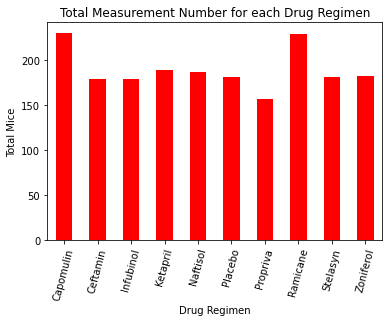

In [46]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_regimen_ct = drug_groups["Mouse ID"].count()
drug_pdplot = drug_regimen_ct.plot.bar( rot = 75, title = "Total Measurement Number for each Drug Regimen", fontsize =10, colormap = "prism")
drug_pdplot.set_xlabel("Drug Regimen")
drug_pdplot.set_ylabel("Total Mice")
drug_pdplot

In [ ]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot




In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
